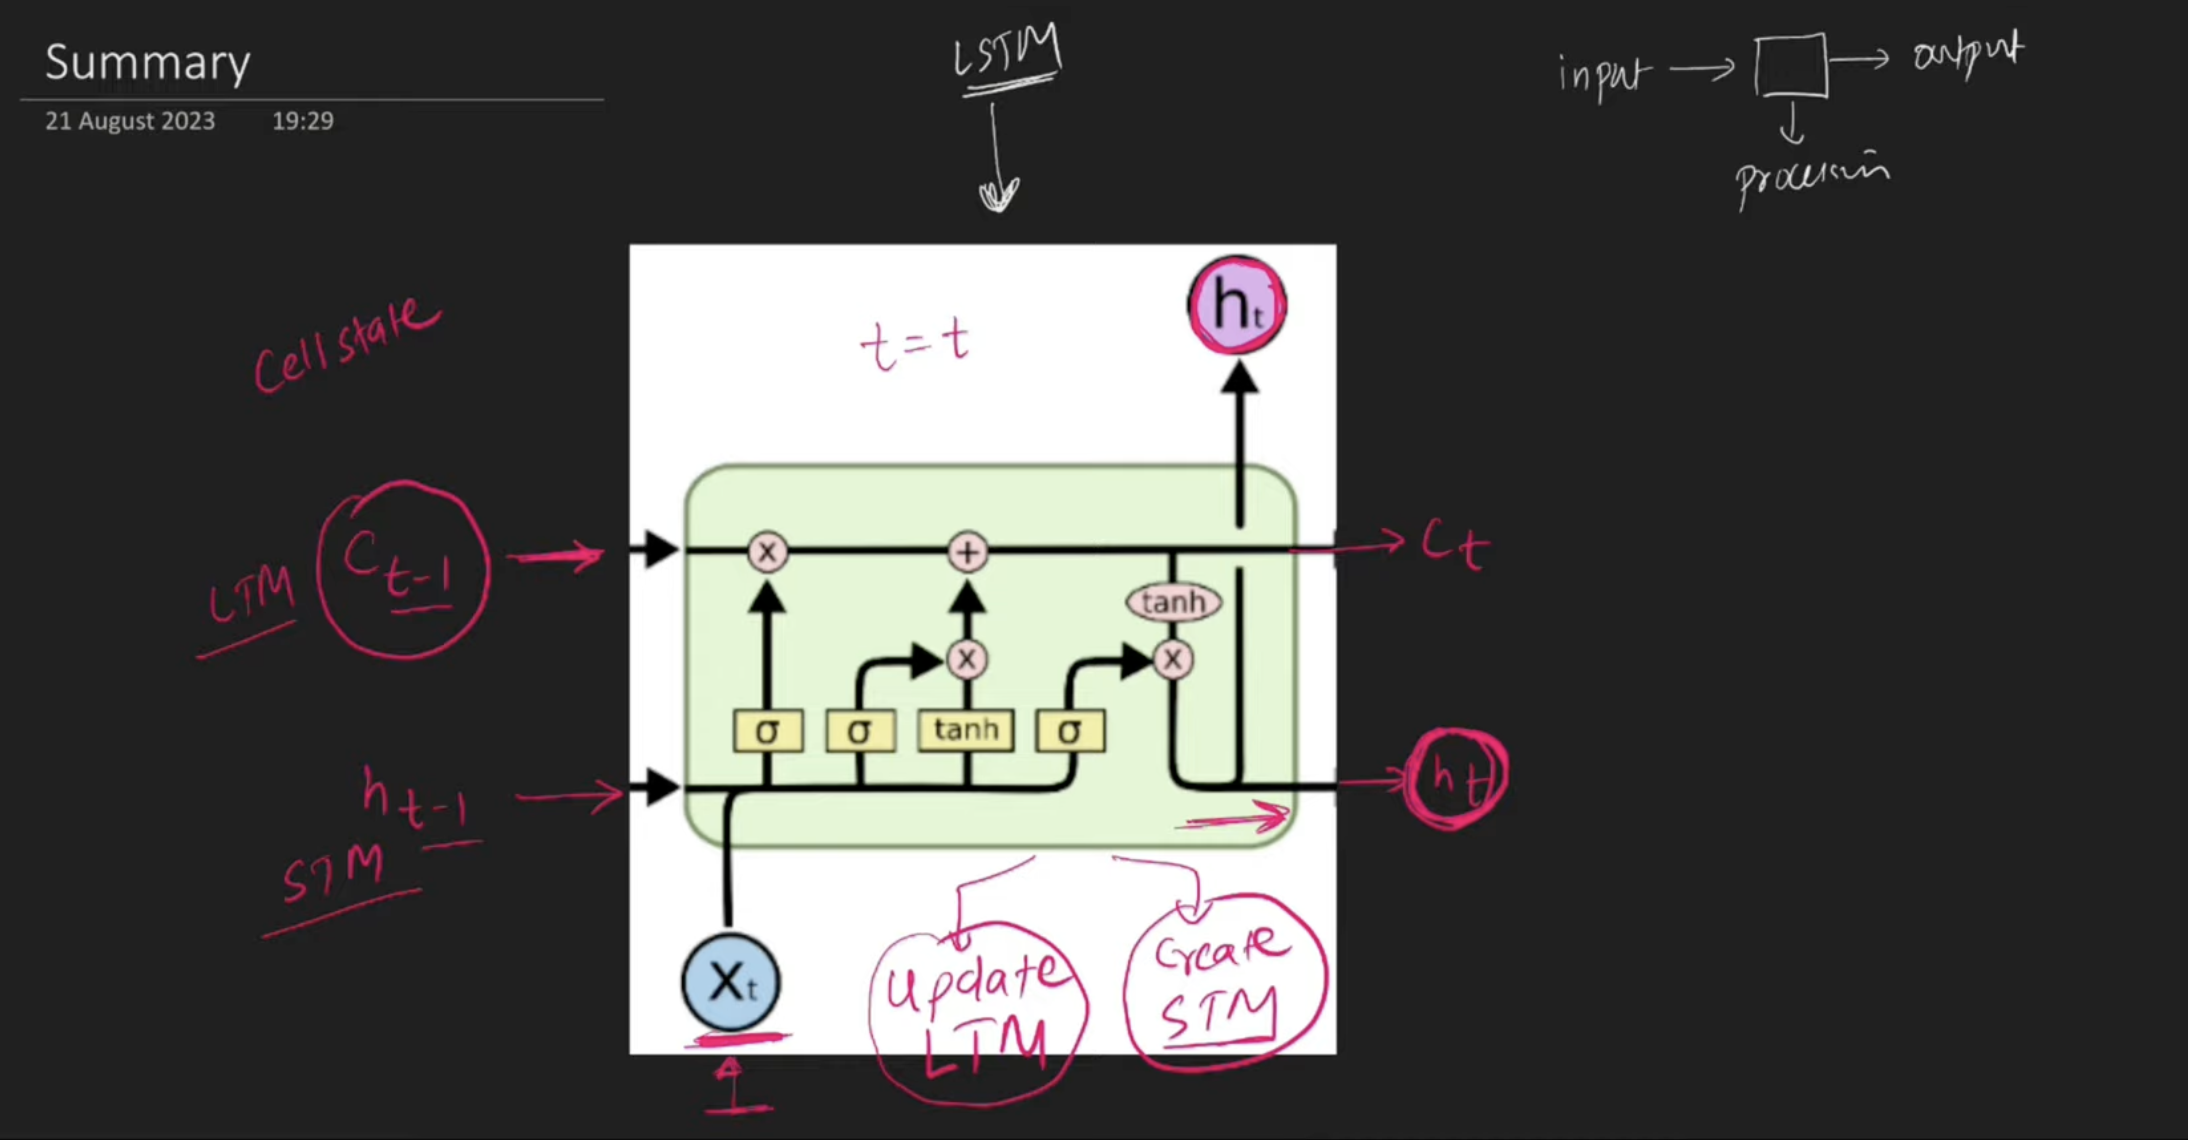
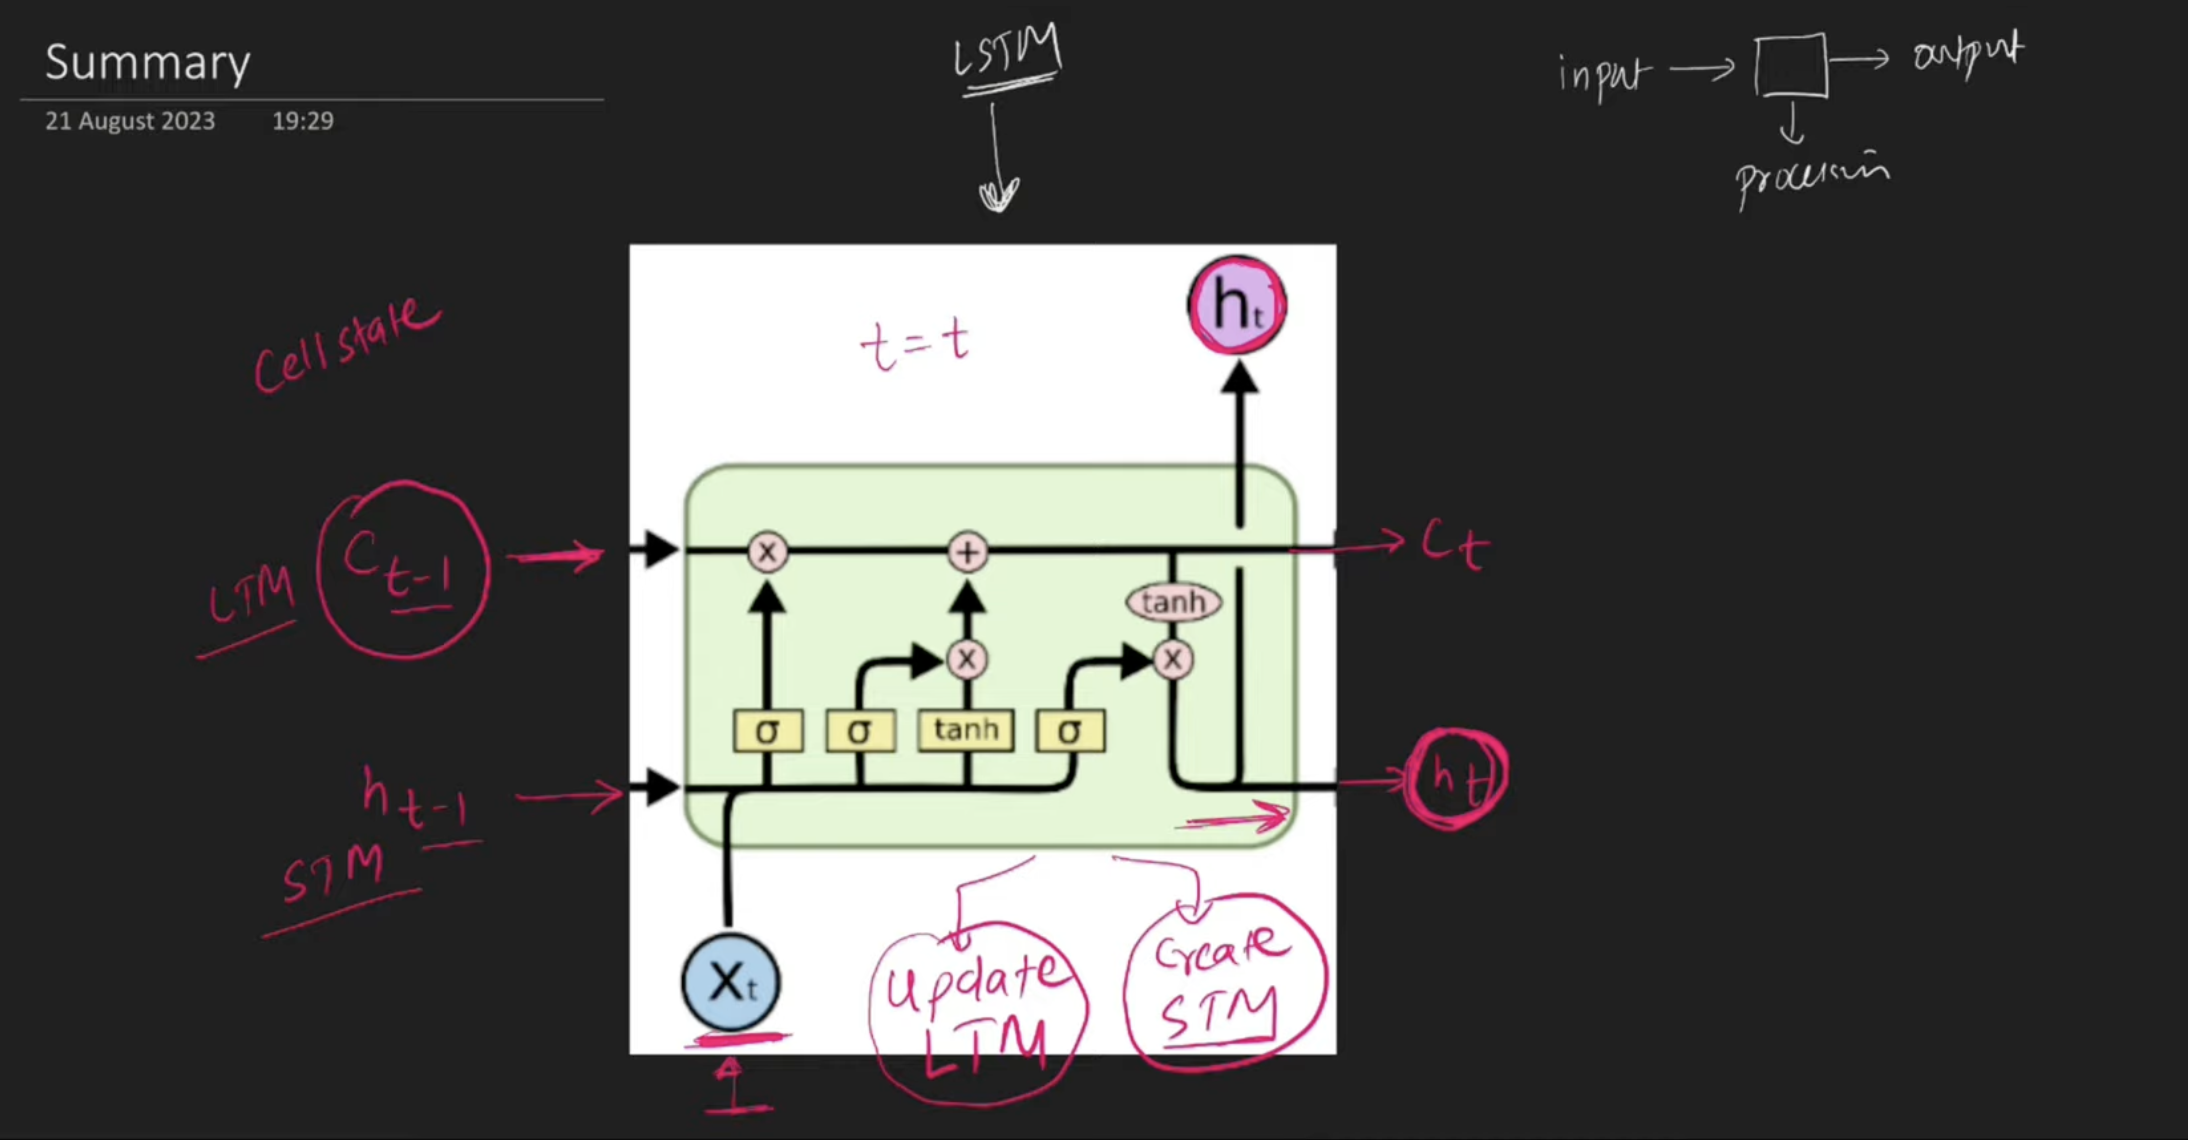

Steps: 

1. Data preprocessing
2. Model
3. training loop 
4. prediction

In [33]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import Counter
from torch.utils.data import Dataset, DataLoader
from nltk.tokenize import word_tokenize
import nltk

In [2]:
document = """About the Profile  
What is the user's current academic background?  
The user is a 3rd-year B.Tech Computer Science Engineering undergraduate student. The user has developed a strong foundation in core computer science concepts, including data structures, algorithms, database management, operating systems, and computer networks. The user has also specialized in machine learning (ML) and artificial intelligence (AI) by working on various real-world projects and developing expertise in data science and deep learning.  

What machine learning algorithms has the user learned?  
The user has learned the following ML algorithms and has implemented them in various projects to solve real-world problems:  
Simple Linear Regression – Used to predict continuous outcomes based on a single independent variable.  
Ridge Regression – An extension of linear regression that adds L2 regularization to reduce overfitting.  
Lasso Regression – Similar to ridge regression but adds L1 regularization to shrink coefficients to zero, useful for feature selection.  
Logistic Regression – Used for binary classification problems, such as predicting loan approvals.  
Naive Bayes – A probabilistic classifier based on Bayes' theorem, used for text classification and spam filtering.  
KNN (K-Nearest Neighbors) – A non-parametric algorithm used for both classification and regression tasks by finding the 'k' nearest points.  
SVM (Support Vector Machine) – A powerful classifier that works well with high-dimensional data.  
Decision Tree – A tree-based model that splits data into branches to classify data points.  
Random Forest – An ensemble model that builds multiple decision trees and combines their outputs for improved accuracy.  

What deep learning techniques is the user familiar with?  
The user is currently working on an LSTM-based next word predictor, which involves training a Recurrent Neural Network (RNN) using Long Short-Term Memory (LSTM) units to predict the next word in a sequence based on context. This project has helped the user develop a deeper understanding of sequence-based models, handling time-series data, and improving model performance through hyperparameter tuning and data preprocessing.  

What are the key projects the user has completed or is working on?  
The user has worked on the following major projects:  

NALCO Project – Prediction of Aluminium wire rod physical properties using AI and ML for better productivity and quality control.  
The project involved developing a comprehensive solution to predict the physical properties of aluminium wire rods, such as UTS (Ultimate Tensile Strength), elongation, and conductivity.  
Developed a real-time dashboard using Power BI to visualize production data and identify patterns.  
Built a machine learning-based prediction model to forecast wire rod properties based on dynamic casting parameters.  
Created a reverse prediction model to adjust casting parameters to achieve the desired wire rod properties.  
Developed an optimization model to improve overall productivity and quality.  
Integrated an IoT-based system to collect real-time data, including chemical composition, casting temperature, and cooling rates.  
Added an offline chatbot to assist operators and provide real-time insights and recommendations.  

Agriculture Project – Provides crop and fertilizer recommendations, crop price prediction, and chatbot support (online and offline).  
Developed a recommendation system to suggest the best crops and fertilizers based on soil quality, weather conditions, and crop history.  
Implemented a machine learning model to predict crop prices based on market trends and historical data.  
Built a chatbot for farmers to provide support and guidance, available both online and offline.  

Car Price Prediction – Regression-based model using web-scraped data to predict car prices.  
Collected and processed car data from multiple websites using web scraping.  
Developed a regression model to predict car prices based on various factors like make, model, year, mileage, and condition.  
Built an API using Flask to allow real-time price prediction based on user input.  

AI-Powered Resume Evaluator – NLP-based project that evaluates resumes and provides feedback.  
Developed a text classification model using NLP to analyze resume content.  
Provided recommendations to improve resume quality based on job requirements.  
Deployed the project using Flask, making it accessible as a web-based application.  

Loan Approval Prediction – Classification-based model with explainability to predict loan approval chances.  
Built a classification model to predict loan approval outcomes based on applicant details.  
Used SHAP (SHapley Additive exPlanations) to improve model interpretability and explain the key factors affecting loan approval decisions.  

Restaurant Recommendation System – Content-based filtering model to suggest restaurants based on user preferences.  
Developed a recommendation system that suggests restaurants based on user reviews and preferences.  
Used NLP techniques to analyze customer reviews and extract key features.  
Improved the recommendation accuracy by combining content-based and collaborative filtering approaches.  

Face Detection Attendance System – AI-based live classroom attendance tracking system.  
Developed a face detection model to track student attendance in real-time using computer vision.  
Added multi-camera support to cover large classrooms and different angles.  
Integrated cloud storage to maintain attendance records and generate reports.  
Built an AI-powered insights feature to analyze attendance patterns, punctuality, and class engagement.  

What other projects is the user currently working on?  
LSTM-Based Next Word Predictor – A deep learning model that predicts the next word based on context.  
The project involves training an LSTM model on a large text dataset.  
The model is capable of understanding complex sentence structures and predicting contextually relevant words.  
Performance is being improved using techniques like word embeddings and dropout layers.  

Build for Bharat Fellowship Internship – Working on a real-world project through the fellowship program.  
The user is participating in the Build for Bharat Fellowship internship, which focuses on solving real-world challenges using AI and ML.  
The project aims to address issues faced by rural communities in India by providing scalable and cost-effective solutions.  

What are the user's technical skills?  
Programming Languages  
Python – Strong expertise in Python for machine learning, data science, and deep learning projects.  
C++ – Used for implementing data structures and algorithms.  

Libraries/Frameworks  
TensorFlow – Used for developing deep learning models (e.g., LSTM, CNN).  
PyTorch – Used for building neural networks and training deep learning models.  
Keras – High-level API for TensorFlow used for rapid prototyping.  
Flask – Used to deploy machine learning models as web-based applications.  
FastAPI – Used to build and deploy fast and scalable APIs.  
Pandas – Used for data manipulation and analysis.  
NumPy – Used for numerical computations and matrix operations.  

Data Science Tools  
Power BI – Used for building interactive dashboards and data visualizations.  
Jupyter Notebooks – Used for coding, experimentation, and data analysis.  

ML Techniques  
EDA (Exploratory Data Analysis) – Used to identify patterns, correlations, and insights in data.  
Feature Engineering – Used to transform raw data into meaningful features.  
Core ML Algorithms – Developed expertise in both supervised and unsupervised learning algorithms.  
Neural Networks – Used for solving complex problems involving pattern recognition and sequence data.  
CNNs (Convolutional Neural Networks) – Used for image-based data analysis and classification.  
RNNs (Recurrent Neural Networks) – Used for sequence-based data and time-series prediction.  

NLP  
Tokenization – Breaking text into words or sentences.  
Text Classification – Categorizing text into different classes based on content.  

Deployment  
Flask – Used for deploying ML models as web applications.  
FastAPI – Used for deploying scalable ML models with high performance.  
Cloud Integration – Used to store and process data in the cloud for better scalability and accessibility.  

"""

In [3]:
# Tokenization
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/sanghvi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sanghvi/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
# tokenize
tokens = word_tokenize(document.lower())

In [5]:
# build vocab
vocab = {'<unk>':0}

for token in Counter(tokens).keys():
  if token not in vocab:
    vocab[token] = len(vocab)

vocab

{'<unk>': 0,
 'about': 1,
 'the': 2,
 'profile': 3,
 'what': 4,
 'is': 5,
 'user': 6,
 "'s": 7,
 'current': 8,
 'academic': 9,
 'background': 10,
 '?': 11,
 'a': 12,
 '3rd-year': 13,
 'b.tech': 14,
 'computer': 15,
 'science': 16,
 'engineering': 17,
 'undergraduate': 18,
 'student': 19,
 '.': 20,
 'has': 21,
 'developed': 22,
 'strong': 23,
 'foundation': 24,
 'in': 25,
 'core': 26,
 'concepts': 27,
 ',': 28,
 'including': 29,
 'data': 30,
 'structures': 31,
 'algorithms': 32,
 'database': 33,
 'management': 34,
 'operating': 35,
 'systems': 36,
 'and': 37,
 'networks': 38,
 'also': 39,
 'specialized': 40,
 'machine': 41,
 'learning': 42,
 '(': 43,
 'ml': 44,
 ')': 45,
 'artificial': 46,
 'intelligence': 47,
 'ai': 48,
 'by': 49,
 'working': 50,
 'on': 51,
 'various': 52,
 'real-world': 53,
 'projects': 54,
 'developing': 55,
 'expertise': 56,
 'deep': 57,
 'learned': 58,
 'following': 59,
 'implemented': 60,
 'them': 61,
 'to': 62,
 'solve': 63,
 'problems': 64,
 ':': 65,
 'simple': 

In [6]:
len(vocab)

467

In [7]:
len(document.split('\n'))

107

In [8]:
input_sentences = document.split('\n')

In [9]:
def text_to_indices(sentence, vocab):
    numerical_sentence = []
    for token in sentence:
        if token in vocab:
            numerical_sentence.append(vocab[token])
        else:
            numerical_sentence.append(vocab['<unk>'])

    return numerical_sentence

In [10]:
input_numerical_sentences = []

for sentence in input_sentences:
    input_numerical_sentences.append(text_to_indices(word_tokenize(sentence.lower()), vocab))

In [11]:
len(input_numerical_sentences)

107

In [12]:
training_sequence = []
for sentence in input_numerical_sentences:

  for i in range(1, len(sentence)):
    training_sequence.append(sentence[:i+1])

In [13]:
len(training_sequence)

1239

In [14]:
len_list = []

for sequence in training_sequence:
  len_list.append(len(sequence))

max(len_list)

74

In [15]:
padded_training_sequence = []
for sequence in training_sequence:

  padded_training_sequence.append([0]*(max(len_list) - len(sequence)) + sequence)

In [16]:
len(padded_training_sequence[10])

74

In [17]:
padded_training_sequence = torch.tensor(padded_training_sequence, dtype=torch.long)

In [18]:
padded_training_sequence

tensor([[  0,   0,   0,  ...,   0,   1,   2],
        [  0,   0,   0,  ...,   1,   2,   3],
        [  0,   0,   0,  ...,   0,   4,   5],
        ...,
        [  0,   0,   0,  ..., 205, 465,  37],
        [  0,   0,   0,  ..., 465,  37, 466],
        [  0,   0,   0,  ...,  37, 466,  20]])

In [19]:
X = padded_training_sequence[:, :-1]
y = padded_training_sequence[:,-1]

In [20]:
class CustomDataset(Dataset):

  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

In [21]:
dataset = CustomDataset(X,y)

In [22]:
len(dataset)

1239

In [23]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

We do not use sequential container in RNN because there are more than one outputs in RNN unline ANN.

outputs we get from RNN are:
1. hidden state (Ht) of all the intermediate states.
2. final (Ht)
3. final (Ct)

In [24]:
class LSTMModel(nn.Module):

  def __init__(self, vocab_size):
    super().__init__()
    self.embedding = nn.Embedding(vocab_size, 100)
    self.lstm = nn.LSTM(100, 150, batch_first=True)
    self.fc = nn.Linear(150, vocab_size)

  def forward(self, x):
    embedded = self.embedding(x)
    intermediate_hidden_states, (final_hidden_state, final_cell_state) = self.lstm(embedded)
    output = self.fc(final_hidden_state.squeeze(0))
    return output

In [25]:
model = LSTMModel(len(vocab))

In [26]:
epochs = 50
learning_rate = 0.001

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [27]:
# training loop

for epoch in range(epochs):
  total_loss = 0

  for batch_x, batch_y in dataloader:

    optimizer.zero_grad() # grad reset

    output = model(batch_x) # forward prop

    loss = criterion(output, batch_y) # loss calculation

    loss.backward() # back prop

    optimizer.step() # grad update

    total_loss = total_loss + loss.item() # loss calculation

  print(f"Epoch: {epoch + 1}, Loss: {total_loss:.4f}")

Epoch: 1, Loss: 229.5901
Epoch: 2, Loss: 197.8187
Epoch: 3, Loss: 181.6810
Epoch: 4, Loss: 165.4474
Epoch: 5, Loss: 150.5141
Epoch: 6, Loss: 136.5707
Epoch: 7, Loss: 123.1211
Epoch: 8, Loss: 111.1967
Epoch: 9, Loss: 98.8444
Epoch: 10, Loss: 87.8658
Epoch: 11, Loss: 77.8851
Epoch: 12, Loss: 68.3340
Epoch: 13, Loss: 60.1396
Epoch: 14, Loss: 52.6591
Epoch: 15, Loss: 46.0759
Epoch: 16, Loss: 40.4758
Epoch: 17, Loss: 35.4043
Epoch: 18, Loss: 31.0969
Epoch: 19, Loss: 27.4539
Epoch: 20, Loss: 24.2777
Epoch: 21, Loss: 21.7455
Epoch: 22, Loss: 19.4966
Epoch: 23, Loss: 17.4203
Epoch: 24, Loss: 15.8666
Epoch: 25, Loss: 14.3697
Epoch: 26, Loss: 13.0906
Epoch: 27, Loss: 12.0562
Epoch: 28, Loss: 11.0672
Epoch: 29, Loss: 10.2705
Epoch: 30, Loss: 9.6790
Epoch: 31, Loss: 9.0780
Epoch: 32, Loss: 8.4708
Epoch: 33, Loss: 7.9140
Epoch: 34, Loss: 7.5136
Epoch: 35, Loss: 7.1014
Epoch: 36, Loss: 6.6950
Epoch: 37, Loss: 6.3827
Epoch: 38, Loss: 6.1121
Epoch: 39, Loss: 5.8581
Epoch: 40, Loss: 5.6323
Epoch: 41, L

In [28]:
# prediction

def prediction(model, vocab, text):

  # tokenize
  tokenized_text = word_tokenize(text.lower())

  # text -> numerical indices
  numerical_text = text_to_indices(tokenized_text, vocab)

  # padding
  padded_text = torch.tensor([0] * (74 - len(numerical_text)) + numerical_text, dtype=torch.long).unsqueeze(0)

  # send to model
  output = model(padded_text)

  # predicted index
  value, index = torch.max(output, dim=1)

  # merge with text
  return text + " " + list(vocab.keys())[index]

In [29]:
prediction(model, vocab, "The user is")

'The user is a'

In [30]:
import time

num_tokens = 10
input_text = "The user is"

for i in range(num_tokens):
  output_text = prediction(model, vocab, input_text)
  print(output_text)
  input_text = output_text
  time.sleep(0.5)

The user is a
The user is a 3rd-year
The user is a 3rd-year b.tech
The user is a 3rd-year b.tech computer
The user is a 3rd-year b.tech computer science
The user is a 3rd-year b.tech computer science engineering
The user is a 3rd-year b.tech computer science engineering undergraduate
The user is a 3rd-year b.tech computer science engineering undergraduate student
The user is a 3rd-year b.tech computer science engineering undergraduate student .
The user is a 3rd-year b.tech computer science engineering undergraduate student . the


In [31]:
dataloader1 = DataLoader(dataset, batch_size=32, shuffle=False)

In [32]:
# Function to calculate accuracy
def calculate_accuracy(model, dataloader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # No need to compute gradients
        for batch_x, batch_y in dataloader1:
            # Get model predictions
            outputs = model(batch_x)

            # Get the predicted word indices
            _, predicted = torch.max(outputs, dim=1)

            # Compare with actual labels
            correct += (predicted == batch_y).sum().item()
            total += batch_y.size(0)

    accuracy = correct / total * 100
    return accuracy

# Compute accuracy
accuracy = calculate_accuracy(model, dataloader)
print(f"Model Accuracy: {accuracy:.2f}%")

Model Accuracy: 97.42%
